# Projeto Final - Identificando o número de grupos da amostra
## MC886 - 2S2017
### Carlos Augusto Figueiredo Freitas de Carvalho - 165684
### Giovani Nascimento Pereira - 168609
### Seong Eun Kim - 
### Cesar Vilela Bueno - 



A ideia dessa parte do projeto, era analisar melhor a base de dados. O esperado era que ela fosse separada em 16 clusters (já que os dados são do "16 personalities test").
Esperançosamente, esse resultado poderá nos ajudar de alguma forma na classificação e no aprenizado futuro do nosso modelo.

In [51]:
#Bibliotecas e imports

import numpy
import sys
from PIL import Image, ImageFilter
from numpy import genfromtxt
from sklearn.cluster import KMeans, MiniBatchKMeans, SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score, pairwise_distances
from sklearn.decomposition import PCA
import csv

from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Constantes
nTotal = 49159
nFeatures = 163 # + gender, age, country, accuracy
nTreino = int(nTotal/5)

print('----> Done')

----> Done


In [60]:
#Atualizar com o caminho do csv no seu diretorio
csvPath = "./16PF/data.csv"


# Pegando os dados
print('-----------Pegando os dados----------')
reader = csv.reader(open(csvPath, "r"), delimiter=",")
med = list(reader)
data_pre= numpy.array(med)
print(data_pre.shape)

data = numpy.ones((nTotal, nFeatures))
for num in range(1, nTotal):
    data[num, 0:(nFeatures)] = data_pre[num, 0:nFeatures].astype("float")
#data = data_pre[2:163].astype("float")

print(data.shape)
print(data)
# O shape dos dados está correto (49159, 163)

print('------> Done')

-----------Pegando os dados----------
(49160, 169)
(49159, 163)
[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  4.  2. ...,  2.  5.  2.]
 [ 4.  3.  4. ...,  2.  2.  2.]
 ..., 
 [ 4.  5.  4. ...,  4.  4.  4.]
 [ 2.  4.  2. ...,  4.  5.  4.]
 [ 4.  4.  4. ...,  4.  5.  4.]]
------> Done


In [61]:
# Montando Grupo para análise

# Separa em teste
print('-----------Montando Teste----------')
X = numpy.ones((nTreino, nFeatures + 1))
for num in range(0, nTreino):
    X[num, 1:(nFeatures+1)] = data[num, 0:nFeatures]/5

print(X)
print('------> Done')

-----------Montando Teste----------
[[ 1.   0.2  0.2 ...,  0.2  0.2  0.2]
 [ 1.   0.2  0.8 ...,  0.4  1.   0.4]
 [ 1.   0.8  0.6 ...,  0.4  0.4  0.4]
 ..., 
 [ 1.   0.8  1.  ...,  0.4  0.6  0.8]
 [ 1.   0.8  0.8 ...,  0.6  0.4  0.6]
 [ 1.   0.8  0.8 ...,  0.8  0.8  1. ]]
------> Done


### Definindo o Número de Clusters pelo Elbow

Estamos usando o modelo do Kmeans.
O primeiro passo é descobrir quantos clusters há, para isso fazemos ums seção de repetidos treinos com número de cluster variável e depois plotamos os valores do erro em funcao do numero de clusters, o que nos da o "elbow graphic".
A partir desse grafico, podemos analisar 

------ Definindo melhor numero de clusters pelo elbow ----
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0


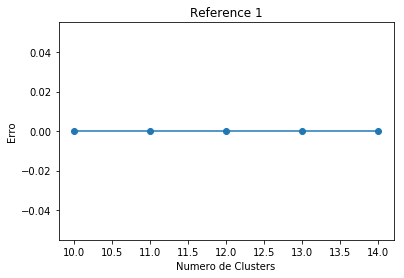

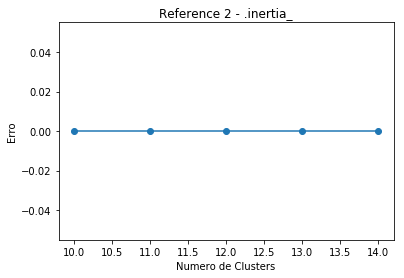

------> Done


In [64]:
# Usando o metodo do elbow
# Reference1: https://pythonprogramminglanguage.com/kmeans-elbow-method/
# Reference2: http://www.awesomestats.in/python-cluster-validation/

print('------ Definindo melhor numero de clusters pelo elbow ----')
#kmeans = KMeans(random_state = 1)
#distortions = []


# k means determine k
distortions1 = []
distortions2 = []

K = range(10, 15)
for k in K:
    sys.stdout.write(str(k) + ' ')
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    
    print(kmeanModel.inertia_)
    
    # Reference 1
    distortions1.append(sum(numpy.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
     
    # Reference 2
    distortions2.append(kmeanModel.inertia_)
    
plt.plot(K, distortions1, 'o-')
plt.xlabel('Numero de Clusters')
plt.ylabel('Erro')
plt.title('Reference 1')
plt.show()

plt.plot(K, distortions2, 'o-')
plt.xlabel('Numero de Clusters')
plt.ylabel('Erro')
plt.title('Reference 2 - .inertia_')
plt.show()

print('------> Done')

### Definindo o Número de Clusters pelo Silhouette

Estamos usando o modelo do Kmeans inicialmente.
O modelo do elbow ainda deixou as coisas meio difíceis de serem vistas - não se formou um cotovelo muito claro, então vamos usar o metodo da Silhouette para tentar identificar melhor e ser capaz de estudar o modelo conforme o número de clusters aumenta.
Um numero negativo significa que o método acha que aquele ponto não pertence àquele grupo, e o contrário para números positivos.

In [58]:
# Fazendo pelo Silhouette de novo
# Reference: http://www.awesomestats.in/python-cluster-validation/

print('-------- Definindo melhor numero de clusters pelo Silhouette --------')

X_scaled = X
silhuetas_medias = []

cluster_range = range( 10, 12 )

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict( X_scaled )

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(X_scaled, cluster_labels, sample_size = 300)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)
  silhuetas_medias.append(silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.spectral(float(i) / n_clusters)
      ax1.fill_betweenx(numpy.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

  plt.show()

print('-----> Done')

-------- Definindo melhor numero de clusters pelo Silhouette --------


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

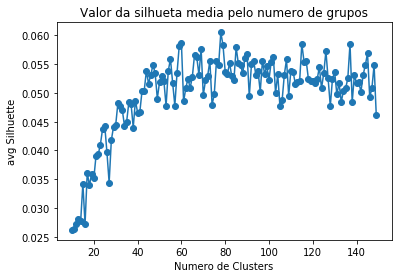

-----> Done


In [6]:
# Vamos plotar um gráfico do valor da silhueta média para cada número de n_clusters e ver no que dá

plt.plot(cluster_range, silhuetas_medias, 'o-')
plt.xlabel('Numero de Clusters')
plt.ylabel('avg Silhuette')
plt.title('Valor da silhueta media pelo numero de grupos')
plt.show()

print('-----> Done')

-------- Entendendo Dados ----------
Media = 24.0641025641  desvio padrao = 18.0308423396


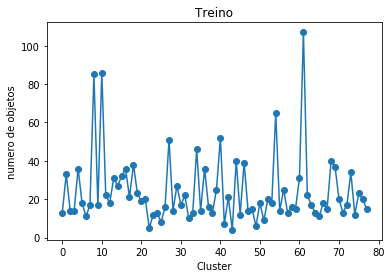

Media = 26.5256410256  desvio padrao = 23.9725935179


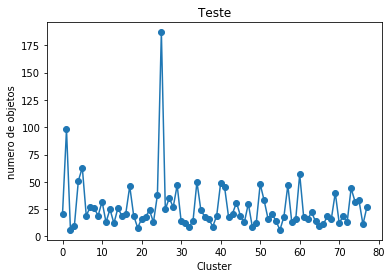

---->Done


In [12]:
# Vamos entender melhor como os dados estão aglomerados
# Numero de objetos em cada cluster

print('-------- Entendendo Dados ----------')

# Calculando o numero de objetos em cada cluster - Conjunto de treino
clusterer = KMeans(n_clusters=78, random_state=10)
res = clusterer.fit_predict(X_treino)
range_cluster = range(0, 78)
n_clusters = 78
repeticoes = numpy.ones((n_clusters))
rep_range = range(1, len(res))

#Calcula numero de repeticoes
for i in rep_range:
    a = res[i]
    repeticoes[a] += 1

#Calcula Media e desvio padrao
avg_value = sum(repeticoes)/float(len(repeticoes))
desvp = numpy.std(repeticoes)

# Conjunto de treino 
print('Media =', avg_value, ' desvio padrao =', desvp)
plt.plot(range_cluster, repeticoes, 'o-')
plt.xlabel('Cluster')
plt.ylabel('numero de objetos')
plt.title('Treino')
plt.show()


# Calculando o numero de objetos em cada cluster - Conjunto de teste
res = clusterer.fit_predict(X_teste)
repeticoes = numpy.ones((n_clusters))
rep_range = range(1, len(res))
for i in rep_range:
    a = res[i]
    repeticoes[a] += 1
    
#Calcula Media e desvio padrao
avg_value = sum(repeticoes)/float(len(repeticoes))
desvp = numpy.std(repeticoes)
    
# Conjunto de teste
print('Media =', avg_value, ' desvio padrao =', desvp)
plt.plot(range_cluster, repeticoes, 'o-')
plt.xlabel('Cluster')
plt.ylabel('numero de objetos')
plt.title('Teste')
plt.show()

print('---->Done')

### Outros modelos de Clusterização

Depois de conseguirmos o melhor resultado com o Kmeans, passamos a testar outros modelos de clusterização para tentarmos encontrar melhores resultado.


In [15]:
# Fazer um teste com mini-batch k-means
#
#
miniKmeans = MiniBatchKMeans(n_clusters = 78)
label_mini = miniKmeans.fit_predict(X_treino)
print('Mudando para MiniBatchKMeans temos: ', silhouette_score(X_treino, label_mini), '\n')

Mudando para MiniBatchKMeans temos:  -0.0152369184224 



In [21]:
# MEDOIDS
# https://github.com/salspaugh/machine_learning/blob/master/clustering/kmedoids.py

distancia_treino = pairwise_distances(X_treino, metric='euclidean')
clusters, medoids = kmedoids.cluster(distancia_treino, 78)
print('Numero de clusters: ', 78)
print('Mudando para K-Medoids temos: ', silhouette_score(X_treino, clusters), '\n')

#
#

Numero de clusters:  78
Mudando para K-Medoids temos:  0.0476824143376 



### Aplicando PCA

Com o resultado do silhouette_score não tendo melhorado muito, uma outra técnica para tentr melhorar nosso modelo de clusterização era reduzia a dimensionalidade dos dados - e para isso usamos o PCA

In [35]:
#	APLICANDO PCA
#
#
for i in range (1, 100):
    pca = PCA(n_components= i/100, svd_solver='full')
    X_treino_pca = pca.fit_transform(X_treino)
    kmeans_pca = KMeans(n_clusters=78)
    label_teste = kmeans_pca.fit_predict(X_treino_pca)

    #print('Aplicando PCA no nosso melhor modelo com clusters:', 78, 'e variancia: ', i/10)
    # calcula e imprime os silhouette_score desse modelo com esse numero de clusters
    silhouette_score_new = silhouette_score(X_treino, label_teste)
    print(X_treino_pca.shape[1], silhouette_score_new)

#
#
#

1 -0.0327808072678
2 -0.040649988016
2 -0.0402021052939
3 -0.0300321403825
4 -0.0272460454811
5 -0.0211285909964
6 -0.0181001769663
7 -0.0169115855944
8 -0.0128591818478
9 -0.00827878183945
11 -0.00500227010405
12 -0.00531045865874
13 -0.00223750195183
15 0.00058385206908
17 -0.0013869137779
18 0.00268503163557
20 0.00535564206291
22 0.0111097064564
24 0.00731605819796
26 0.0135418055627
29 0.0191633351698
31 0.0233282770073
34 0.0247126068819
36 0.0268520368892
39 0.0321486139788
42 0.028642049239
45 0.0386641423648
48 0.0376205477149
51 0.0452516219106
55 0.0466560923334
58 0.0445475524665
62 0.0512595800815
66 0.0556261833216
70 0.0517844904598
74 0.0536334528041
79 0.0565521016974
83 0.0570230531541
88 0.0571665442229
93 0.0586466537106
98 0.057413322013
104 0.0559489587775
109 0.0592348469639
115 0.0585571070053
120 0.057374992718
126 0.0530549169839
132 0.0556203389119
139 0.0568581106355
145 0.0588853125293
152 0.0588246537581
159 0.0573740921324
166 0.0588901346989
174 0.055277